In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Оптимизация типов данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


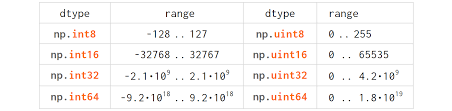

In [ ]:
df = df.fillna(0)

In [ ]:
df['PassengerId'] = df['PassengerId'].astype(np.int16)
df['Survived'] = df['Survived'].astype(np.int8)
df['Age'] = df['Age'].astype(np.int8)
df['Pclass'] = df['Pclass'].astype(np.int8)
df['Parch'] = df['Parch'].astype(np.int8)
df['Fare'] = df['Fare'].astype(np.float16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int16  
 1   Survived     891 non-null    int8   
 2   Pclass       891 non-null    int8   
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int8   
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int8   
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float16
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float16(1), int16(1), int64(1), int8(4), object(5)
memory usage: 48.9+ KB


In [ ]:
df['Cabin'].info(memory_usage="deep")

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 33.7 KB


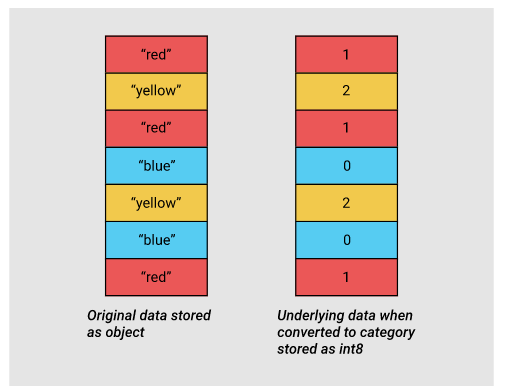

In [ ]:
df['Cabin'] = df['Cabin'].astype("category")
df['Cabin'].info(memory_usage="deep")

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 14.6 KB


### Sparse columns

In [ ]:
df_1 = pd.DataFrame(
    np.random.randint(1, 1_000_000, size=(10**6, 3)),
    columns = ["col1", "col2", "col3"],
)

df_1["col1"] = df_1.col1.astype(np.float64)

In [ ]:
df_1.loc[::2, "col1"] = np.nan
df_1.loc[::3, "col1"] = np.nan
df_1.loc[::5, "col1"] = np.nan

In [ ]:
df_1.head()

,col1,col2,col3
0,NaN,459495,395040
1,422567.0,371508,288380
2,NaN,382205,900732
3,NaN,199670,898561
4,NaN,491917,293809


In [ ]:
df_1[df_1['col1'].isna()].shape

(733334, 3)

In [ ]:
df_1['col1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: col1
Non-Null Count   Dtype  
--------------   -----  
266666 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [ ]:
df_1["col1"] = df_1.col1.astype("Sparse[float64]")

In [ ]:
df_1["col1"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: col1
Non-Null Count   Dtype               
--------------   -----               
266666 non-null  Sparse[float64, nan]
dtypes: Sparse[float64, nan](1)
memory usage: 3.1 MB


### Итерация по pd.DataFrame

In [ ]:
result = []

for _, row in df.iterrows():
  res = row.Fare * 1.25
  result.append(res)
df['Fare'] = res

In [ ]:
%%timeit

res = [row.Fare * 1.25 for _, row in df.iterrows()]

43.5 ms ± 678 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
def calc_fare(row):
  return row.Fare * 1.25

In [ ]:
df.apply(calc_fare, axis=1)

In [ ]:
%%timeit

df['Fare_new'] = df['Fare'].apply(lambda row: row * 1.25, axis=1)

10.3 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit

res = [row.Fare * row.Percent for row in df.itertuples()]

3.82 ms ± 768 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit

np_arr = df.to_numpy();
res = [row[9] * 1.25 for row in np_arr]

466 µs ± 130 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit

df_dict = df.to_dict("records");
res = [row["Fare"] * 1.25 for row in df_dict]

11.6 ms ± 3.27 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Получение столбца

In [ ]:
%%timeit

df.iloc[0]["Name"];

120 µs ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit

df["Name"].values[0];

3.55 µs ± 79.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Преобразование столбца по условию

In [ ]:
def assign_class(value):
    if value == 'male':
      return 0
    return 1

In [ ]:
%%timeit

res = df['Sex'].apply(assign_class)

940 µs ± 475 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit

res = np.where(df["Sex"] == 'male', 0, 1)

228 µs ± 37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### cuDF

[cuDF vs Pandas dataframe performance comparison](https://arshovon.com/blog/cudf-vs-df/)

[cuDF.pandas benchmarks docs](https://docs.rapids.ai/api/cudf/stable/cudf_pandas/benchmarks/)